# <center> Projet4 : Anticipez les besoins en consommation électrique de bâtiments
    
    Notebook Modelisation

# 1. Importation des modules et données

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
#dataset avant PCA 
dataset=pd.read_csv("C:\\Users\Marwa\Downloads\projet4\\dataset_2016_Avant_PCA.csv")
dataset=dataset.drop(columns='Unnamed: 0', axis=1)

In [3]:
#dataset après PCA 
X_projected= pd.read_csv("C:\\Users\Marwa\Downloads\projet4\\dataset_2016_PCA.csv")
X_projected= X_projected.drop(columns='Unnamed: 0', axis=1)

In [4]:
dataset.describe()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuilAge,...,30,31,32,33,34,35,36,37,38,39
count,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,...,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000
mean,-5.597125e-16,-1.216653e-15,2.109956e-17,1.357827e-16,6.584461e-17,4.449711e-16,2.073348e-17,7.132417e-16,1.088092e-16,-7.062030e-17,...,0.118106,0.045564,0.007194,0.341727,0.058753,0.002998,0.000600,0.145683,0.126499,0.047362
std,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,...,0.322830,0.208599,0.084539,0.474431,0.235232,0.054685,0.024485,0.352894,0.332510,0.212476
min,-3.985135e-01,-6.280792e-01,-3.618146e-01,-2.589043e+00,-2.790439e-01,-9.293101e-02,-2.865598e-01,-2.104372e-01,-2.471150e-01,-1.621851e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.710594e-02,-4.756736e-01,-3.006158e-01,-5.862142e-01,-2.382841e-01,-9.293101e-02,-2.463150e-01,-2.104372e-01,-2.193734e-01,-8.275199e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-5.710594e-02,-3.232680e-01,-2.339708e-01,1.828722e-01,-1.944911e-01,-9.293101e-02,-2.034307e-01,-1.568574e-01,-1.800587e-01,-9.429111e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-5.710594e-02,-1.845679e-02,-4.547242e-02,7.757097e-01,-5.051539e-02,-9.293101e-02,-4.842372e-02,-4.781619e-02,-5.655742e-02,9.750009e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.749773e+01,1.446007e+01,3.095240e+01,1.376558e+00,2.864238e+01,2.440211e+01,3.134179e+01,3.160919e+01,2.220942e+01,1.891537e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
X_projected.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
count,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,...,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03
mean,-1.716586e-16,-1.088258e-16,-1.159478e-16,-2.570053e-17,1.494275e-16,-1.547523e-17,8.978962e-17,3.325511e-17,1.464323e-17,-4.425417e-17,...,1.938564e-17,-2.828806e-17,-2.575877e-17,1.118210e-17,5.657611e-19,2.001380e-17,1.269635e-17,2.288005e-17,-7.263375e-18,5.033610e-18
std,2.150618e+00,1.192456e+00,1.095169e+00,1.008963e+00,9.432572e-01,8.720552e-01,6.473609e-01,5.548042e-01,5.219260e-01,4.661865e-01,...,2.994197e-01,2.914129e-01,2.774174e-01,2.667236e-01,2.515667e-01,2.455791e-01,2.193677e-01,2.103894e-01,2.024031e-01,1.956038e-01
min,-7.854947e-01,-1.236659e+01,-1.470610e+01,-6.427753e+00,-5.115310e+00,-1.094897e+01,-1.618542e+00,-1.552884e+00,-1.155431e+00,-8.720969e-01,...,-8.099647e-01,-8.964603e-01,-8.045525e-01,-6.334686e-01,-9.766790e-01,-8.901675e-01,-6.372951e-01,-5.501942e-01,-7.849304e-01,-5.858147e-01
25%,-5.500235e-01,-3.739039e-01,-3.352460e-01,-7.042369e-01,-5.814350e-01,-1.362340e-01,-6.608493e-01,-2.400651e-01,-2.563509e-01,-2.812543e-01,...,-1.394230e-01,-1.490813e-01,-1.904306e-01,-1.318828e-01,-9.091247e-02,-1.129146e-01,-1.029070e-01,-1.036773e-01,-7.592201e-02,-6.103928e-02
50%,-4.196111e-01,-2.758912e-03,2.013841e-01,-1.186826e-01,7.776466e-02,-1.577466e-02,2.907540e-01,2.407013e-02,-2.158630e-02,-3.282592e-02,...,-6.159159e-02,-1.419199e-02,2.317331e-02,-4.558046e-02,5.103418e-03,-2.505448e-02,-3.761748e-02,-3.071925e-02,-1.068129e-02,-9.023995e-03
75%,-8.049102e-02,4.342821e-01,5.381532e-01,6.586106e-01,6.980938e-01,1.077167e-01,4.331300e-01,2.877682e-01,1.979701e-01,1.113536e-01,...,3.396657e-02,1.634943e-01,1.118825e-01,7.441932e-02,8.954371e-02,9.053783e-02,3.184074e-02,4.944368e-02,6.600046e-02,4.129869e-02
max,6.265255e+01,2.640173e+01,1.945749e+01,1.115043e+01,5.761926e+00,1.984135e+01,4.980072e+00,1.701577e+00,1.242222e+00,1.820951e+00,...,1.441116e+00,9.613380e-01,1.005367e+00,1.082319e+00,1.131059e+00,1.003345e+00,1.090655e+00,9.808847e-01,9.398654e-01,1.090430e+00


# 2. Séparation des données

Afin de tester notre meilleur modèle sur les données, nous allons mettre de côté une partie des données initiales qui ne seront pas inclusent dans les modèles intermédiaires. Nous allons donc spliter nos données pour obtenir un jeu d'entrainement et un jeu de test.

- train_test_split(): le dataset est mélangé de façon aléatoire avant d'étre divisé én deux parties. 

Nous pouvons contoler l'aléatoire en fixant l'argumant random_state=n 
- random_state
si nous ne spécifions pas random_state dans le code, une nouvelle valeur aléatoire est générée et les ensembles de données d'apprentissage et de test auraient des valeurs différents à chaque fois. 

Si fixer: peu importe le nombre defois que vous exécutez votre code, le résultat sera le même. 

**Description des données cibles :**

- TotalGHGEmissions: émissions de CO2 
- SiteEnergyUse(kBtu): est la consommation d'énergie du site d'une propriété divisée par sa surface de plancher brute

In [6]:
from sklearn.model_selection import train_test_split
def separation(dataset,  test_size):
    y= dataset[['TotalGHGEmissions','SiteEnergyUse(kBtu)']]
    data= dataset.drop(columns=y, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=test_size, random_state=42)
    print("taille des données d'apprentissage", X_train.shape)
    print("taille des cibles d'apprentissage", y_train.shape)
    print("taille des données de test", X_test.shape)
    print("taille des cibles de test", y_test.shape)
    return X_train, X_test, y_train, np.array(y_test)

In [7]:
X_train, X_test, y_train, y_test= separation(dataset,0.2)

taille des données d'apprentissage (1334, 48)
taille des cibles d'apprentissage (1334, 2)
taille des données de test (334, 48)
taille des cibles de test (334, 2)


# 3. Modélisation

Nous allons choisir de calculer trois métriques pour évaluer nos modèles : **MAE, RMSE et R2** 

- MAE : Mean Absolute Error.
- RMSE : Root Mean Squared Error.
- R² : Coefficient de détermination, carré du coeffiscient de corrélation linéaire.

In [8]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
#model metrics 
def initialiser():
  models= pd.DataFrame(
        data=['R2','MAE','RMSE'],
        columns=['Model']
        ).set_index(keys='Model')
  return models
def add_model(model, model_name, y_test, y_pred):
     model[model_name] = np.array(
            object=[
                r2_score(y_test, y_pred), # R2
                mean_absolute_error(y_test, y_pred),#MAE
                np.sqrt(mean_squared_error(y_test, y_pred)) #RMSE      
         ]
        )
     return model
#plot model results 
def plot (model, title): 
   model.plot(marker='o')
   plt.xticks(range(len(model)), model.index)
   plt.xlabel('')
   plt.title(title)
   plt.axis('auto')
   plt.show()

## 3.1 Modèles de prédiction de émissions de CO2

A ce stade, nous avons à notre disposition un jeu d'entrainement et un jeu de test pour nos prédictions **des émissions de CO2**. 

Comme dans toute approche de modélisation, nous allons devoir vérifier que notre modèle est réellement performant. La régression linéaire étant un modèle relativement simple, nous allons l'utiliser comme une baseline. 

### 3.1.1 Optimisation des hyperparamètres

On doit choisir le meilleur modèle pour notre problème celui qui nous offre les meilleures performances

Il faut, donc, définir une grille de paramètres en validation croisée.

In [9]:
from sklearn.model_selection import GridSearchCV
params= {'fit_intercept': [True, False],
                      'normalize': [True, False]}

GS = GridSearchCV(LinearRegression(), param_grid=params, cv=5, scoring='neg_mean_absolute_error')
GS.fit(X_train, y_train['TotalGHGEmissions'])
model_scores=[]
model_scores.append(
      {
      'model':'LinearRegression',
      'best_score': GS.best_score_,
      'best_param':GS.best_params_,
       })
lr= GS.best_estimator_
y_pred= lr.predict(X_test)
##
model1= initialiser()
add_model(model1, 'linear Regression', y_test[:, 0], y_pred)

,linear Regression
Model,
R2,1.000000
MAE,0.000003
RMSE,0.000004


Nous avons donc nos métriques de Baseline et nous allons à présent pouvoir réaliser cinq autres modèles de régression linéaire multivariée et le comparer aux métriques de base obtenues. 

**Choix des hyperparamètres avec GridSearch**

In [10]:
#on peut utiliser estimator.get_params() pour connaitre estimator parameters example RidgeCV().get_params()
model_param= {

'Ridge': {'model': Ridge(), 
          'params': {'alpha':[1, 10, 0.1, 0.001]}},


'svm': {
    'model':SVR(),
    'params':{
        'C': [1.0, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.0001, 0.001, 0.005, 0.1]
       
             }
    },

'RandomForest': {
    'model': RandomForestRegressor(),
    'params': {
        'n_estimators': [10, 50, 100, 1000]
        
              }
               },

'GradientBoosting':{
    'model': GradientBoostingRegressor(),
    'params': {'n_estimators': [10, 50, 100, 1000]}
}
}

Hyper paramètres pour la variable **TotalGHGEmissions**

In [11]:
model_scores=[]
for model_name , model_para in model_param.items():
  GS= GridSearchCV(model_para['model'], model_para['params'], cv=5, scoring='neg_mean_absolute_error')
  #cv is the number of fold
  GS.fit(X_train, y_train['TotalGHGEmissions'])
  model_scores.append(
      {
      'model':model_name,
      'best_score': GS.best_score_,
      'best_param':GS.best_params_,
       })
pd.DataFrame(model_scores).values

array([['Ridge', -3.6072872167464448e-06, {'alpha': 0.001}],
       ['svm', -0.048094259623741385,
        {'C': 1.0, 'gamma': 0.0001, 'kernel': 'linear'}],
       ['RandomForest', -0.04855505339545402, {'n_estimators': 50}],
       ['GradientBoosting', -0.04598763282403501, {'n_estimators': 1000}]],
      dtype=object)

Implementer les modèles avec les best hyper maramètres affichier par GridsearchCV pour la variable **TotalGHGEmissions**

In [12]:
def Gradient_boosting():
   gb=GradientBoostingRegressor(n_estimators=1000) 
   gb.fit(X_train, y_train['TotalGHGEmissions'])
   y_pred= gb.predict(X_test)
   return y_pred

def random_forest():
    rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
    rf.fit(X_train, y_train['TotalGHGEmissions']) 
    y_pred= rf.predict(X_test)
    return y_pred

def SVM():
  svm = SVR(kernel='linear', gamma= 0.0001, C= 1 )
  svm= svm.fit(X_train, y_train['TotalGHGEmissions'])
  y_pred= svm.predict(X_test)
  return y_pred
  
def Ridges():
   ridge = Ridge(alpha=0.001)
   ridge.fit(X_train, y_train['TotalGHGEmissions'])
   y_pred = ridge.predict(X_test)
   return y_pred


### 3.1.2 Prédiction des émissions de CO2 avec la variable 'ENERGYSTARScore'

La variable 'ENERGYSTARScore' fournit une aperçue complet de la performance énérgitique d'un batiment. 

Il est exprimé sur une échelle de 1 à 100 facile à comprendre : plus le score est élevé, meilleure est la performance énergétique du bâtiment.

Notre objectif est d'évaluer l'interet de la variable ENERGYSTARScore pour la prédiction d'émissions CO2

       linear Regression  RandomForest     Ridge       SVM  Gradient boosting
Model                                                                        
R2              1.000000      0.659383  1.000000  0.997378           0.679352
MAE             0.000003      0.041959  0.000003  0.047811           0.049265
RMSE            0.000004      0.591676  0.000004  0.051908           0.574070


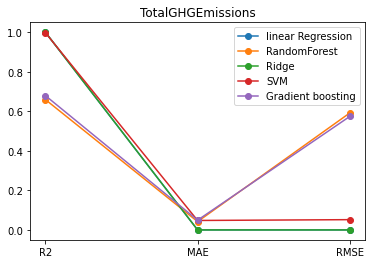

In [13]:
#RandomForest
y_pred_r= random_forest()
add_model( model1 ,'RandomForest', y_test[:, 0], y_pred_r)

#Ridge     
y_pred_ridge=Ridges()
add_model(model1, 'Ridge', y_test[:, 0], y_pred_ridge)
#
#SVM
y_pred_svm= SVM()
add_model(model1, 'SVM', y_test[:, 0], y_pred_svm)
#
#Gradient boosting
y_pred_gb = Gradient_boosting()
add_model(model1, 'Gradient boosting', y_test[:, 0], y_pred_gb)

print(pd.DataFrame(model1))
plot(model1, 'TotalGHGEmissions')

**Observations**

On comparant les résultats obtenus par chaque modèle, on constate que:

- Les métriques des modèle Ridge semblent identiques avec celle de la baseline "Régression linéaire".
- - Les métriques des modèle GBoost semblent identiques avec celle de Random Forest.
- Les modèles linéaires (Ridge et RL) répondent plus à notre problème de prédiction que les modèles non-linéaires (SVM à noyau) et les modèles ensemblistes (GBoost et Random Forest).
- Les métriques ne se sont que légérement améliorées pour les prédictions des émissions de CO2 entre le SVM et les modèles linéaires. 

### 3.1.3 Prédiction des émissions de CO2 sans la variable 'ENERGYSTARScore'

Dans ce paragraphe, nous allons voir si la variable ENERGYSTARScore a un impact sur la qualité de prédiction.

C:\Users\Marwa\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


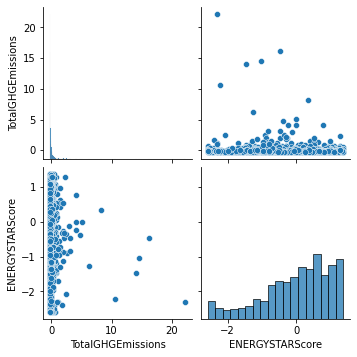

In [14]:
cols= ['TotalGHGEmissions','ENERGYSTARScore' ]
sns.pairplot(dataset[cols], size = 2.5)

On remarque ici que le score ENERGY STAR ne semble pas avoir de corrélation importante avec les émissions de CO2.

In [15]:
X_train_s= X_train.drop(columns='ENERGYSTARScore', axis=1)
X_test_s= X_test.drop(columns='ENERGYSTARScore', axis=1) 

In [16]:
def linear_():
  lr=LinearRegression(fit_intercept=False, normalize=True)
  lr.fit(X_train_s, y_train['TotalGHGEmissions'])
  y_pred= lr.predict(X_test_s)
  return y_pred 
def Gradient_boosting():
   gb=GradientBoostingRegressor(n_estimators=1000) 
   gb.fit(X_train_s, y_train['TotalGHGEmissions'])
   y_pred= gb.predict(X_test_s)
   return y_pred

def random_forest():
    rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    rf.fit(X_train_s, y_train['TotalGHGEmissions']) 
    y_pred= rf.predict(X_test_s)
    return y_pred

def SVM():
  svm = SVR(kernel='linear', gamma= 0.0001, C= 1 )
  svm= svm.fit(X_train_s, y_train['TotalGHGEmissions'])
  y_pred= svm.predict(X_test_s)
  return y_pred
  
def Ridges():
   ridge = Ridge(alpha=0.001)
   ridge.fit(X_train_s, y_train['TotalGHGEmissions'])
   y_pred = ridge.predict(X_test_s)
   return y_pred



        linear_  RandomForest     Ridge       SVM  Gradient boosting
Model                                                               
R2     1.000000      0.637141  1.000000  0.995263           0.495530
MAE    0.000003      0.045904  0.000003  0.068397           0.058948
RMSE   0.000004      0.610688  0.000004  0.069776           0.720059


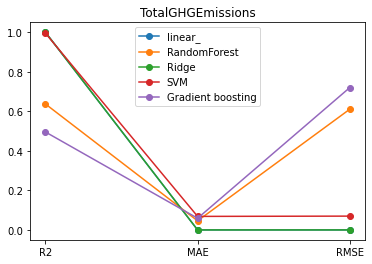

In [17]:

model3 = initialiser()

y_predlr= linear_()
add_model(model3, 'linear_', y_test[:,0], y_predlr)
#RandomForest
y_pred_r= random_forest()
add_model( model3 ,'RandomForest', y_test[:, 0], y_pred_r)

#Ridge     
y_pred_ridge=Ridges()
add_model(model3, 'Ridge', y_test[:, 0], y_pred_ridge)
#
#SVM
y_pred_svm= SVM()
add_model(model3, 'SVM', y_test[:, 0], y_pred_svm)
#
#Gradient boosting
y_pred_gb = Gradient_boosting()
add_model(model3, 'Gradient boosting', y_test[:, 0], y_pred_gb)

print(pd.DataFrame(model3))
plot(model3, 'TotalGHGEmissions')

**Interpretations** 
On comparant les résultats obtenus par chaque modèle, on constate que:

- Comme dans le cas de l'étude précedante avec en tenant compte de la feature "ENERGYSTARScore" : les métriques des modèle Ridge semblent identiques avec celle de la baseline "Régression linéaire".
- Les modèles linéaires (Ridge et RL) répondent plus à notre problème de prédiction que les modèles non-linéaires (SVM à noyau) et les modèles ensemblistes (GBoost et Random Forest).
- Les métriques se sont améliorées pour les prédictions des émissions de CO2 nos modèles avec la variable ENERGYSTARScore. En d'autres termes, cette variable a un impact sur les prédictions.

### 3.1.4 Prédiction des émissions de CO2 après ACP

In [18]:
y= dataset[['TotalGHGEmissions','SiteEnergyUse(kBtu)']]
X_train_pca, X_test_pca, y_train_pca, y_test_pca= train_test_split(X_projected.iloc[:,:4],y,  test_size=0.2, random_state=42)

In [19]:
def linear_():
  lr=LinearRegression(fit_intercept=False, normalize=True)
  lr.fit(X_train_pca, y_train_pca['TotalGHGEmissions'])
  y_pred= lr.predict(X_test_pca)
  return y_pred 
def Gradient_boosting():
   gb=GradientBoostingRegressor(n_estimators=1000) 
   gb.fit(X_train_pca, y_train_pca['TotalGHGEmissions'])
   y_pred= gb.predict(X_test_pca)
   return y_pred

def random_forest():
    rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    rf.fit(X_train_pca, y_train_pca['TotalGHGEmissions']) 
    y_pred= rf.predict(X_test_pca)
    return y_pred

def SVM():
  svm = SVR(kernel='linear', gamma= 0.0001, C= 1 )
  svm= svm.fit(X_train_pca, y_train_pca['TotalGHGEmissions'])
  y_pred= svm.predict(X_test_pca)
  return y_pred
  
def Ridges():
   ridge = Ridge(alpha=0.001)
   ridge.fit(X_train_pca, y_train_pca['TotalGHGEmissions'])
   y_pred = ridge.predict(X_test_pca)
   return y_pred


        linear_  RandomForest     Ridge       SVM  Gradient boosting
Model                                                               
R2     0.915263      0.928481  0.915257  0.893970           0.884480
MAE    0.107039      0.072991  0.107048  0.094648           0.079461
RMSE   0.295112      0.271120  0.295122  0.330114           0.344571


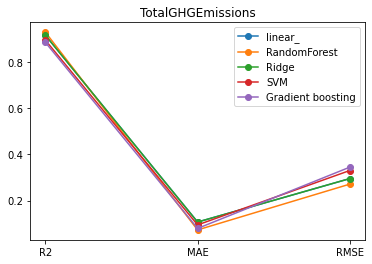

In [20]:
y_test_pca= np.array(y_test_pca)
model5= initialiser()

#linear Regression 
y_predlr= linear_()
add_model(model5, 'linear_', y_test_pca[:,0], y_predlr)

#RandomForest
y_pred_r= random_forest()
add_model( model5 ,'RandomForest', y_test_pca[:, 0], y_pred_r)

#Ridge     
y_pred_ridge=Ridges()
add_model(model5, 'Ridge', y_test_pca[:, 0], y_pred_ridge)
#
#SVM
y_pred_svm= SVM()
add_model(model5, 'SVM', y_test_pca[:, 0], y_pred_svm)
#
#Gradient boosting
y_pred_gb = Gradient_boosting()
add_model(model5, 'Gradient boosting', y_test_pca[:, 0], y_pred_gb)

print(pd.DataFrame(model5))
plot(model5, 'TotalGHGEmissions')

**Interpretations**

On comparant les résultats obtenus par chaque modèle, on constate que:

- Les métriques des modèle Ridge semblent très proches avec celle de la baseline "Régression linéaire".
- Les modèles linéaires (Ridge et RL) répondent moins que la Rondom forest à notre problème de prédiction.
- Les métriques de modèle Random forest conviennet le plus pour les prédictions des émissions de CO2. 
- On constate ici que tous les Métriques pour tous les modèles ont totalement changé d'ordre avec une dégradation des performances sauf une lègere amélioration pour les métriques du foréts aléatoires.
- On peut en déduire donc que la technique PCA influe négativement sur la prédiction des émissions de CO2. 

## 3.2 Modèles de consommation totale d'énergie

### 3.2.1 Optimisation des hyperparamètres

In [21]:
from sklearn.model_selection import GridSearchCV
params= {'fit_intercept': [True, False],
                      'normalize': [True, False]}

GS = GridSearchCV(LinearRegression(), param_grid=params, cv=5, scoring='neg_mean_absolute_error')
GS.fit(X_train, y_train['SiteEnergyUse(kBtu)'])
model_scores=[]
model_scores.append(
      {
      'model':'LinearRegression',
      'best_score': GS.best_score_,
      'best_param':GS.best_params_,
       })
pd.DataFrame(model_scores).values
lr2= GS.best_estimator_

In [22]:
GS.best_estimator_


LinearRegression(fit_intercept=False, normalize=True)

**Baseline**

In [23]:
lr2.fit(X_train, y_train['SiteEnergyUse(kBtu)'])
y_pred= lr2.predict(X_test)
model2= initialiser()
add_model(model2, 'linear Regression', y_test[:, 1], y_pred)
print(pd.DataFrame(model2))

       linear Regression
Model                   
R2              0.994095
MAE             0.020707
RMSE            0.069156


Nous avons à ce stade les résultats de notre baseline, passons pour les autres modèles.On affiche les hyper paramètres de la GridSearch avec validation croisée pour chaque variable.  

Hyper paramètres pour la variables **SiteEnergyUse(kbtu)**

In [24]:
model_scores=[]
for model_name , model_para in model_param.items():
  GS= GridSearchCV(model_para['model'], model_para['params'], cv=5, scoring='neg_mean_absolute_error')
  #cv is the number of fold
  GS.fit(X_train, y_train['SiteEnergyUse(kBtu)'])
  model_scores.append(
      {
      'model':model_name,
      'best_score': GS.best_score_,
      'best_param':GS.best_params_,
       })
pd.DataFrame(model_scores).values

array([['Ridge', -0.01827189348765983, {'alpha': 1}],
       ['svm', -0.05349410425283595,
        {'C': 100, 'gamma': 0.0001, 'kernel': 'linear'}],
       ['RandomForest', -0.05190822052167673, {'n_estimators': 1000}],
       ['GradientBoosting', -0.038885421946361985,
        {'n_estimators': 1000}]], dtype=object)

**prédiction de SiteEnergyUse(kBtu)**

In [25]:
def Gradient_boosting():
   gb=GradientBoostingRegressor(n_estimators=1000) 
   gb.fit(X_train, y_train['SiteEnergyUse(kBtu)'])
   y_pred= gb.predict(X_test)
   return y_pred

def random_forest():
    rf = RandomForestRegressor(n_estimators = 1000)
    rf.fit(X_train, y_train['SiteEnergyUse(kBtu)']) 
    y_pred= rf.predict(X_test)
    return y_pred

def SVM():
  #kernal: rbf, linear, poly
  #C: integer
  # Gamma: float (auto)
  svm = SVR(kernel='linear', gamma= 0.0001, C= 100)
  svm= svm.fit(X_train, y_train['SiteEnergyUse(kBtu)'])
  y_pred= svm.predict(X_test)
  return y_pred
  
def Ridges():
   ridge = Ridge(alpha=1)
   ridge.fit(X_train, y_train['SiteEnergyUse(kBtu)'])
   y_pred = ridge.predict(X_test)
   return y_pred


**'SiteEnergyUse(kBtu) avant PCA**

       linear Regression  RandomForest     Ridge       SVM  Gradient boosting
Model                                                                        
R2              0.994095      0.910670  0.994862  0.990325           0.802940
MAE             0.020707      0.040762  0.019727  0.058057           0.045818
RMSE            0.069156      0.268987  0.064513  0.088524           0.399513


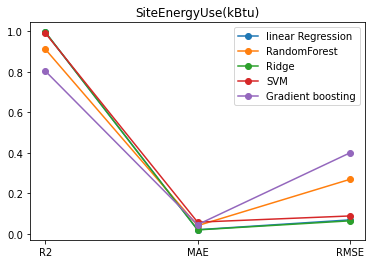

In [26]:
y_test=np.array(y_test)
#RandomForest
y_pred_r= random_forest()
add_model( model2 ,'RandomForest', y_test[:,1], y_pred_r) 

#Ridge     
y_pred_ridge=Ridges()
add_model(model2, 'Ridge', y_test[:,1], y_pred_ridge)
#
#SVM
y_pred_svm= SVM()
add_model(model2, 'SVM', y_test[:,1], y_pred_svm)
#
#Gradient boosting
y_pred_gb = Gradient_boosting()
add_model(model2, 'Gradient boosting', y_test[:,1], y_pred_gb)
print(pd.DataFrame(model2))
plot(model2, 'SiteEnergyUse(kBtu)')

**Interpretations**

On comparant les résultats obtenus par chaque modèle, on constate que:

- Les métriques des modèle Ridge semblent identiques avec celle de la baseline "Régression linéaire".
- Les modèles linéaires (Ridge et RL) répondent le plus à notre problème de prédiction de la consommation totale d'énergie par rapport aux modèles non-linéaires (SVM à noyau gaussian) et les modèles ensemblistes (GBoost et Random Forest).

**'SiteEnergyUse(kBtu) aprés PCA**

In [27]:
def linear_():
  lr=LinearRegression(fit_intercept=False, normalize=True)
  lr.fit(X_train_pca, y_train_pca['SiteEnergyUse(kBtu)'])
  y_pred= lr.predict(X_test_pca)
  return y_pred 

def Gradient_boosting():
   gb=GradientBoostingRegressor(n_estimators=1000) 
   gb.fit(X_train_pca, y_train_pca['SiteEnergyUse(kBtu)'])
   y_pred= gb.predict(X_test_pca)
   return y_pred

def random_forest():
    rf = RandomForestRegressor(n_estimators = 1000)
    rf.fit(X_train_pca, y_train_pca['SiteEnergyUse(kBtu)']) 
    y_pred= rf.predict(X_test_pca)
    return y_pred

def SVM():
  #kernal: rbf, linear, poly
  #C: integer
  # Gamma: float (auto)
  svm = SVR(kernel='linear', gamma= 0.0001, C= 100)
  svm= svm.fit(X_train_pca, y_train_pca['SiteEnergyUse(kBtu)'])
  y_pred= svm.predict(X_test_pca)
  return y_pred
  
def Ridges():
   ridge = Ridge(alpha=1)
   ridge.fit(X_train_pca, y_train_pca['SiteEnergyUse(kBtu)'])
   y_pred = ridge.predict(X_test_pca)
   return y_pred


         linear  RandomForest     Ridge       SVM  Gradient boosting
Model                                                               
R2     0.924624      0.848446  0.924457  0.921998           0.893293
MAE    0.070599      0.076430  0.071016  0.079453           0.069328
RMSE   0.247086      0.350361  0.247360  0.251353           0.293987


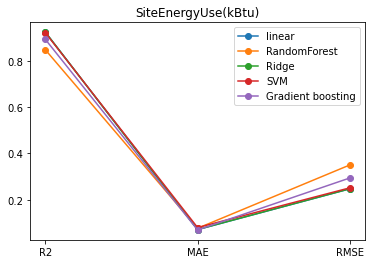

In [28]:
y_test_pca=np.array(y_test_pca)

model4= initialiser()

#linear Regression 
y_predlr= linear_()
add_model(model4, 'linear', y_test_pca[:,1], y_predlr)
#RandomForest
y_pred_r= random_forest()
add_model( model4 ,'RandomForest', y_test[:,1], y_pred_r) 

#Ridge     
y_pred_ridge=Ridges()
add_model(model4, 'Ridge', y_test[:,1], y_pred_ridge)
#
#SVM
y_pred_svm= SVM()
add_model(model4, 'SVM', y_test[:,1], y_pred_svm)
#
#Gradient boosting
y_pred_gb = Gradient_boosting()
add_model(model4, 'Gradient boosting', y_test[:,1], y_pred_gb)
print(pd.DataFrame(model4))
plot(model4, 'SiteEnergyUse(kBtu)')

**Interpretations**

On comparant les résultats obtenus par chaque modèle, on constate que:

- Les métriques des modèle Ridge, et SVM semblent identiques avec celle de la baseline "Régression linéaire".
- Les modèles linéaires (Ridge et RL) et non linéaires (SVM) répondent le plus à notre problème de prédiction de consommation totale d'énergie par rapport aux modèles ensemblistes (GBoost et Random Forest).
- On constate ici que tous les Métriques pour tous les modèles ont eu une lègere amélioration pour les modèles ensemblistes.
- On peut en déduire donc que la technique PCA influe positivement sur la prédiction de la consommation d'énergie par modèles ensemblistes et négativement sur les modèles linéaires et non linéaires.

## 3.3 Comparaison entre les performances des modèles après ACP et Lasso

### 3.3.1 Emission de CO2

In [29]:
#linearRegression Baseline
def linear():
  lr=LinearRegression(fit_intercept=False, normalize=True)
  lr.fit(X_train, y_train['TotalGHGEmissions'])
  y_pred= lr.predict(X_test)

model6= initialiser()
add_model(model6, 'linear Regression baseline', y_test[:, 0], y_pred)



,linear Regression baseline
Model,
R2,0.718216
MAE,0.154983
RMSE,0.538156


In [30]:
#linearRegression avec PCA 
lr=LinearRegression(fit_intercept=False, normalize=True)
lr.fit(X_train_pca, y_train_pca['TotalGHGEmissions'])
y_pred= lr.predict(X_test_pca)
add_model(model6, 'linear Regression avec PCA', y_test_pca[:, 0], y_pred)

,linear Regression baseline,linear Regression avec PCA
Model,,
R2,0.718216,0.915263
MAE,0.154983,0.107039
RMSE,0.538156,0.295112


       linear Regression baseline  linear Regression avec PCA     LASSO
Model                                                                  
R2                       0.718216                    0.915263  0.999998
MAE                      0.154983                    0.107039  0.000398
RMSE                     0.538156                    0.295112  0.001551


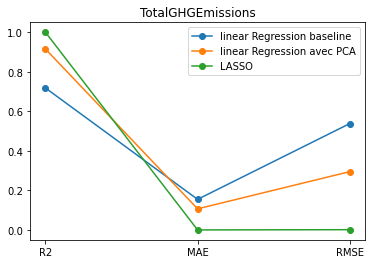

In [31]:
#linearRegression avec Lasso 
params= {'alpha':[1, 10, 0.1, 0.001]}

GS = GridSearchCV(Lasso(), param_grid=params, cv=5, scoring='neg_mean_absolute_error')
GS.fit(X_train, y_train['TotalGHGEmissions'])
model_scores=[]
model_scores.append(
      {
      'model':'LinearRegression',
      'best_score': GS.best_score_,
      'best_param':GS.best_params_,
       })
lr= GS.best_estimator_
y_pred= lr.predict(X_test)
##
add_model(model6, 'LASSO', y_test[:, 0], y_pred)
print(model6)
plot(model6, 'TotalGHGEmissions')

Le modèle Lasso semble étre le meilleur à prédire les émissions de CO2. 

### 3.3.2 Consommation totale d'energie

In [32]:
#linearRegression Baseline
def linear():
  lr=LinearRegression(fit_intercept=False, normalize=True)
  lr.fit(X_train, y_train['SiteEnergyUse(kBtu)'])
  y_pred= lr.predict(X_test)

model7= initialiser()
add_model(model7, 'linear Regression baseline', y_test[:, 1], y_pred)



,linear Regression baseline
Model,
R2,0.682078
MAE,0.147866
RMSE,0.507449


In [33]:
#linearRegression avec PCA 
lr=LinearRegression(fit_intercept=False, normalize=True)
lr.fit(X_train_pca, y_train_pca['TotalGHGEmissions'])
y_pred= lr.predict(X_test_pca)
add_model(model7, 'linear Regression avec PCA', y_test_pca[:, 1], y_pred)

,linear Regression baseline,linear Regression avec PCA
Model,,
R2,0.682078,0.817865
MAE,0.147866,0.153688
RMSE,0.507449,0.384086


       linear Regression baseline  linear Regression avec PCA     LASSO
Model                                                                  
R2                       0.682078                    0.817865  0.994450
MAE                      0.147866                    0.153688  0.019467
RMSE                     0.507449                    0.384086  0.067046


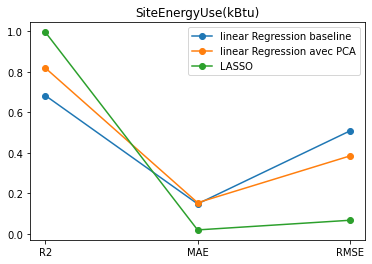

In [34]:
#Lasso 
params= {'alpha':[1, 10, 0.1, 0.001]}

GS = GridSearchCV(Lasso(), param_grid=params, cv=5, scoring='neg_mean_absolute_error')
GS.fit(X_train, y_train['SiteEnergyUse(kBtu)'])
model_scores=[]
model_scores.append(
      {
      'model':'LinearRegression',
      'best_score': GS.best_score_,
      'best_param':GS.best_params_,
       })
lr= GS.best_estimator_
y_pred= lr.predict(X_test)
##
add_model(model7, 'LASSO', y_test[:, 1], y_pred)
print(model7)
plot(model7, 'SiteEnergyUse(kBtu)')

Le modèle Lasso semble étre le meilleur à prédire la consommation totale d'énergie. 